# Protocole Room acoustique

Au cours de ce laboratoire, on utilise le package pyroomacoustics pour observer la propagation de l'acoustique dans différents espaces et différentes situations.


## Objectifs

En plus d'offir l'oportunité de faire un laboratoire à distance, ce laboratoire a pour objectif d'initier les étudiants aux simulations qui peut être une partie importante de la carrière de l'ingénieur en physique. De plus, plusieurs compagnies de Québec qui engagent des ingénieurs en physique s'intéressent à l'acoustique.

Dans le but d'introduire ce laboratoire, vous développerez une compréhension plus exhaustive de comment _Pyroomacoustics_ effectue ses calculs et ce qu'il prend en compte. De plus, dans cette partie, vous serez introduits au vocabulaire pouvant être utilisé

Par la suite, vous nous vous invitons à vous amuser avec le logiciel, c'est-à-dire, d'explorer un thème qui vous intéresse en lien avec la propagation d'onde acoustique. Voici des idées de thème que vous pouvez aborder:

 - Mesurer coefficients liés à la propagation des ondes acoustiques dans l'air.
 - Comparer vos résultats de simulation à des mesures expérimentales prises à l'aide d'un cellulaire (l'application phyPhox permet de faire l'analyse rapide de plusieurs paramètres notament en acoustique).
 - Dessiner une pièce permettant de porter les fréquences de la voix humaine en atténuant celles des machines environnantes dans un environnement industriel.

Nous vous invitons surtout à créer vous même une expérience. De plus, la documentation sur _Pyroomacoustics_ donne plein d'exemples de fonctions permettant de faire des analyses poussées. En effet, _Pyroomacoustics_ a été utilisé pour écrire de nombreux articles scientifiques.


# Matériel

Pour effectuer ce laboratoire, vous aurez besoin

 - du logiciel _Python3_,
 - des packages suivants.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import pyroomacoustics as pra

## Documentation

Vous trouverez dans la documentation sur le package _Pyroomacoustics_ sous forme d'example ici: https://nbviewer.jupyter.org/github/LCAV/pyroomacoustics/blob/master/notebooks/pyroomacoustics_demo.ipynb

De plus, la commande ci-dessous offre de la documentation qui pourrait vous être utile

In [57]:
# print(pra.room.__doc__)

** La commade de documentation ci-dessus peut être utilisée pour presque toutes les fonctions dans _Pyroomacoustics_

## Manipulations

### Comprendre comment la simulation fonctionne

Dans cette partie, utilisez la partie de code ci-dessous inspirée de la documentation _/notebooks/pyroomacoustics_demo.ipynb_ pour répondre aux questions suivantes:

 1. Qu'est-ce l'ordre de l'image?
 2. Dans quelle situation est-ce que le nombre de rayons importe?
 3. Que signifie le paramètre _energy_thres_?
 4. Pourquoi est-ce n'est-il pas recommandé de mettre l'ordre de l'image et le nombre de rayon au maximum? Optimisez les valeurs de ces paramètres. Quels valeurs obtenez-vous?
 5. Résumez, dans vos mots comment fonctionne la simulation.


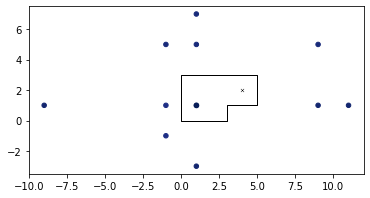

In [58]:
# l'ordre de la simulation est définit ici
simulation_order = 2

# Je commence par définir un fichier à lire (qui est dans le dossier du code) qui donne deux informations:
# le signal et la fréquence d'echantillonage
fs, signal = wavfile.read("arctic_a0010.wav")

# Définir la pièce avec ses materiaux
corners = np.array([[0,0], [0,3], [5,3], [5,1], [3,1], [3,0]]).T  # [x,y]
wall_absorption = 0.2
wall_scattering = 0.1
m = pra.Material(wall_absorption, wall_scattering)
room = pra.Room.from_corners(corners, fs=fs, max_order=simulation_order, materials=m, ray_tracing=True, air_absorption=True)

# Ajouter une source et un microphone
X_source = [1, 1]
room.add_source(X_source, signal=signal)
X_micro = np.array([[4], [2]])  # [[x], [y], [z]]
room.add_microphone(X_micro)

# Ajuster les paramètres du tracer de rayon
room.set_ray_tracing(receiver_radius=0.5, n_rays=10000, energy_thres=1e-5)

# calcule les sources images
room.image_source_model();

# trace un schema de la situation
fig, ax = room.plot(img_order=simulation_order)

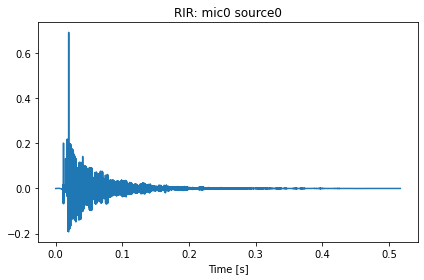

In [59]:
# La RIR (room impulse response) est un résultat clef de ce package
room.plot_rir()
fig = plt.gcf()

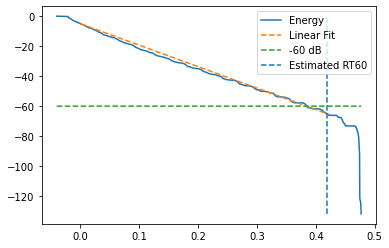

Le RT60 est de 419 ms


In [60]:
# On peut aussi avoir des valeurs scalaire à la sortie de la simulation

# Le RT60 est un calcul sur la RIR permettant de déterminer quand l'intensité sonore est -60dB de l'intensite initiale. 
t60 = pra.experimental.measure_rt60(room.rir[0][0], fs=room.fs, plot=True)
print(f"Le RT60 est de {t60 * 1000:.0f} ms")

In [61]:
# Il est aussi possible d'obtenir le délais moyen du signal avec l'operation suivante
def mean_time(rir, fs):
    dt = 1/fs
    time = np.arange(0, len(rir)*dt, dt)
    mt = np.average(time, weights=abs(rir))
    return mt    

mt = mean_time(room.rir[0][0], room.fs)
print(f"Le temps moyen de propagation du son est {mt * 1000:.0f} ms")

Le temps moyen de propagation du son est 67 ms
